In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **1. Business Understanding**
Our goal is to analyze developer salaries using the StackOverflow 2024 Developer Survey and predict salaries based on key factors.

# Question 1: 
### Which location has the highest salary?

# Question 2:
### Is the remote work became known to the companies?

# Question 3:
### Which location has the highest salary growth?

### Gather Data

- Loading the survey data

In [110]:
def import_data(data_path):
    '''
    returns Survey results public dataframe from data_path

    input: 
        data_path: a path to csv

    outputs:
        df_survey: processed panda dataframe
    '''

    # Load the dataset
    df_survey = pd.read_csv(data_path)

    return df_survey


In [111]:
# get the data frame
df_survey = import_data('survey_results_public.csv')

df_survey.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## **2. Data Understanding**


- The data comes from the stack overflow 2024 survey. It contains data in different types as categorical(Main Branch, Employment, EducationLevel, ...), numerical(Salary, JobStaPoints, ...) and text.

- It has missing data and outliers as well and we will remove the missing data.



In [131]:
df_survey.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,29998.000000,1.758000e+04,15903.000000,15916.000000,15955.000000,15959.000000,15985.000000,15983.000000,15984.000000,15978.000000,15983.000000,15981.000000,1.746400e+04,15790.000000
mean,14999.500000,5.688282e+145,11.309879,18.735800,7.738092,10.344343,24.444741,22.968986,20.436914,16.196383,11.150613,10.198235,8.720847e+04,6.925079
std,8659.821024,7.542070e+147,9.041510,26.020223,18.720677,22.075780,27.026380,26.984865,26.148228,24.861291,23.192035,22.003593,2.084789e+05,2.107990
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,7500.250000,5.800000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.312100e+04,6.000000
50%,14999.500000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.533100e+04,7.000000
75%,22498.750000,2.750000e+05,16.000000,25.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.089060e+05,8.000000
max,29998.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### - As we can see, The maximum repondent experience is 50 years
### - About 75% have 16 years of experience with about 109k $

## **3. Prepate Data**

- We convert the column **"ConvertedCompYearly"** to **"Salary"** for easier use.


In [112]:
from pandas import DataFrame


def process_survey_dataframe(df: DataFrame = df_survey):
    '''
    returns processed dataframe from the original data frame

    input: 
        df: the original Data frame

    outputs:
        df_processed: processed panda dataframe
    '''
    
    df_processed = df.copy()


    # Rename columns for easier use
    df_processed.rename(columns={"ConvertedCompYearly": "Salary"}, inplace=True)
  
    # Convert YearsCodePro to numeric
    df_processed["YearsCodePro"] = pd.to_numeric(df_processed["YearsCodePro"], errors='coerce')


    return df_processed

In [113]:
df = process_survey_dataframe()
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,Salary,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



- We use a subset of columns **"YearsCodePro", "Salary", "Age","RemoteWork", "Employment", "Country"** for easier understanding

In [114]:
columns_to_keep = ["YearsCodePro", "Salary", "Age","RemoteWork", "Employment", "Country"]

df = df[columns_to_keep]

- Creating a Location variable, which will indicate if the respondent is from North America or Europe.

- Remove null values

In [ ]:
# Europe Countries
Europe = [ 'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium','Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Spain', 'Italy','Poland']


# North_America Countries
North_America = ['United States', 'Canada']
    
# Add a new location variable.
df['Location'] = df['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North_America' if x in North_America else 'Other'))

# Filter out the data to include these two locations
df = df[df['Location'].isin(["Europe","North_America"])]

# Drop Null values
df = df.dropna()

df.head()

,YearsCodePro,Salary,Age,RemoteWork,Employment,Country,Location
374,6.0,30074.0,25-34 years old,"Hybrid (some remote, some in-person)","Employed, full-time",Austria,Europe
385,17.0,53703.0,35-44 years old,Remote,"Independent contractor, freelancer, or self-em...",France,Europe
409,50.0,57999.0,55-64 years old,In-person,"Employed, full-time",France,Europe
417,1.0,29000.0,25-34 years old,In-person,"Employed, full-time",Germany,Europe
423,4.0,66592.0,25-34 years old,Remote,"Independent contractor, freelancer, or self-em...",Italy,Europe


## **4. Data Modeling**

- Here are the **Age Distribution of Respondents** which implies that more people within **25-34 Years Old** Have responded to the survey. 

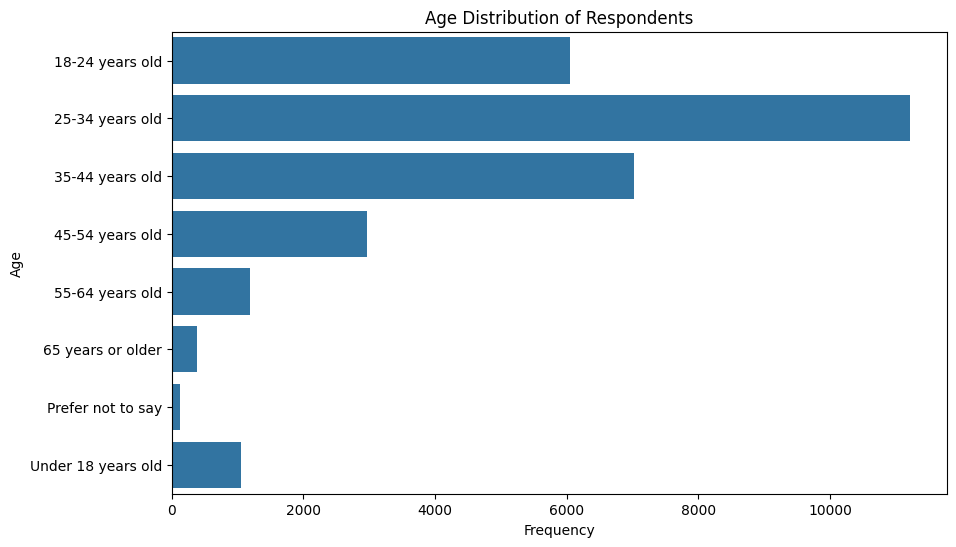

In [81]:
plt.figure(figsize=(10,6))
age_counts = df['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.values, y=age_counts.index, orient='h')
plt.title('Age Distribution of Respondents')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()


- Here are the **Salary Distribution** which implies that salary distribution acroos all respondents. 

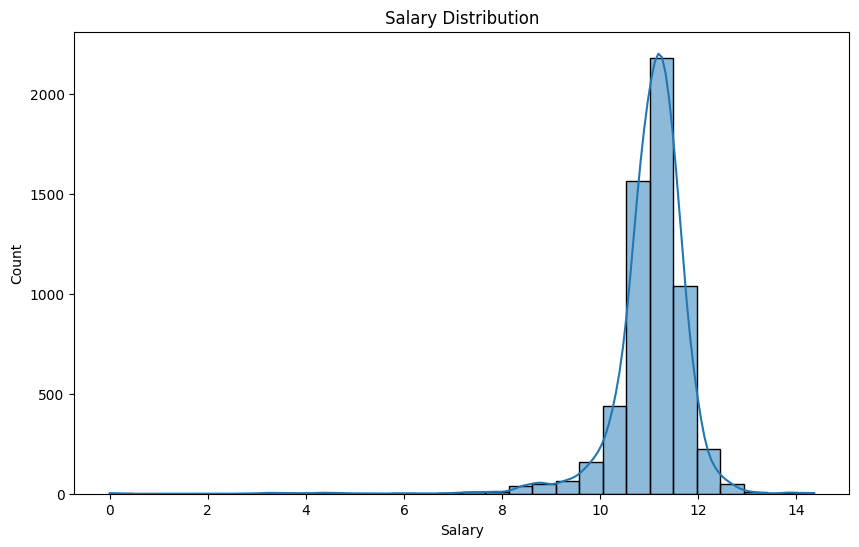

In [123]:
import numpy as np

# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(np.log(df['Salary']), bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

### Making the preprocessing Pipeline

In [144]:
# Preprocessing pipeline
df1 = df.drop_duplicates()

numerical_features = ['YearsCodePro']
categorical_features = ['Employment', 'RemoteWork','Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [145]:
X = df1.drop('Salary',axis=1)
y = df1['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearsCodePro']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Employment', 'RemoteWork',
                                                   'Age'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

### Train our model to predict the salart

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 32355.69961224553
Mean Squared Error: 3170875155.257378
R^2 Score: -0.14398332138135306


## **5.Evaluation**

# Question 1:
## Which location has the highest salary?

Text(0.5, 1.0, 'Mean of Salaries by Location')

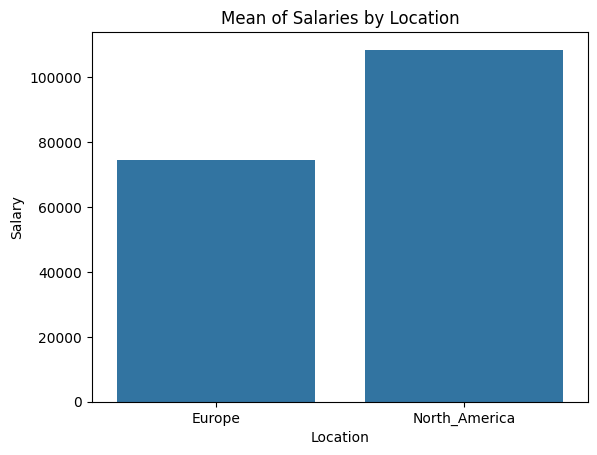

In [124]:
salary_df = df.groupby('Location')['Salary'].mean().reset_index()
sns.barplot(x = 'Location', y = 'Salary', data = salary_df)
plt.title('Mean of Salaries by Location')

### As we can see, The North_America has a highr salary range from Europe

# Question 2:
### Is the remote work became known to the companies?

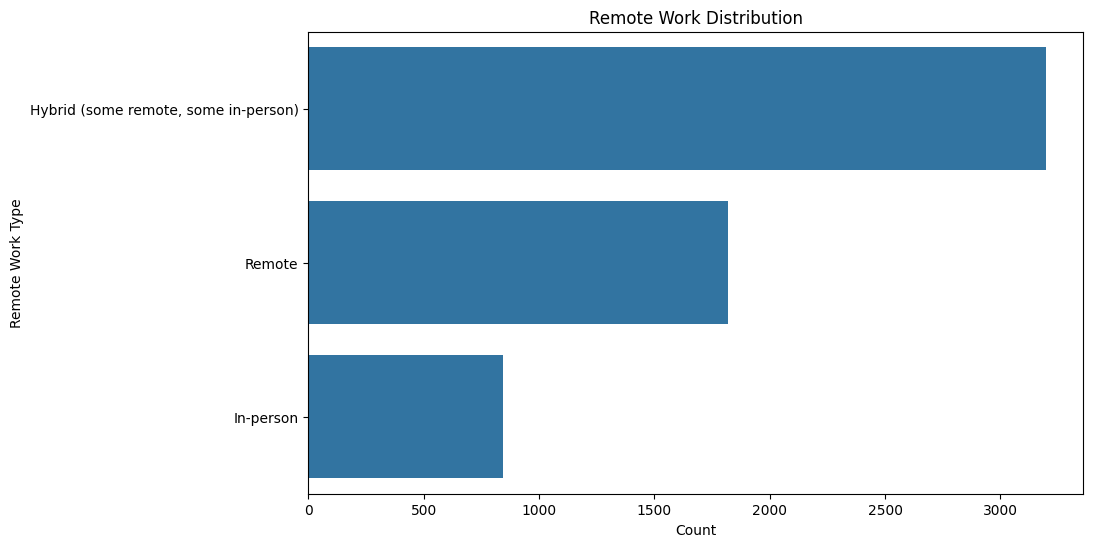

In [120]:
# RemoteWork distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['RemoteWork'], order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Count')
plt.ylabel('Remote Work Type')
plt.show()

### As we can see, the remote work started to be spread out among the companies.

# Question 3:
### Which location has the highest salary growth?

In [141]:
df_salary_years = df[['YearsCodePro', 'Salary', 'Location']].copy()

# Remove invalid YearsCodePro values (-1) and calculate median salary per region & experience
salary_years = (
    df_salary_years[df_salary_years['YearsCodePro'] != -1]
    .groupby(['Location', 'YearsCodePro'], as_index=False)['Salary']
    .median()
)

# Compute cumulative salary change for Europe & North America
salary_years['change'] = (
    salary_years.groupby('Location')['Salary']
    .pct_change()
    .cumsum()
)

# Keep only valid data
salary_years.dropna(inplace=True)

Text(0.5, 0, 'Years of Experience')

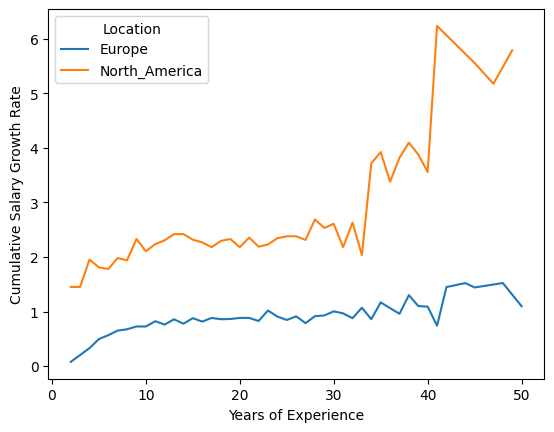

In [143]:
salary_years = salary_years[salary_years['YearsCodePro'] != 0] 

ax = sns.lineplot(x="YearsCodePro", y="change", hue="Location", data=salary_years)
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience')


### As we can see, North America has the highest salary growth.

### What will be the salary when we keep gaining experience?

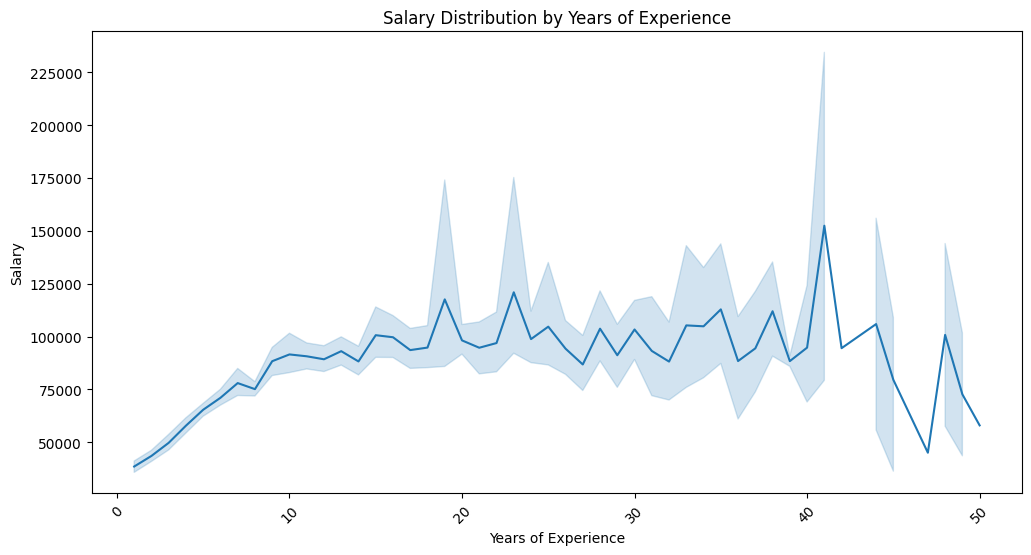

In [130]:
# Salary vs. Years of Professional Coding Experience
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['YearsCodePro'], y=df['Salary'])
plt.title("Salary Distribution by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

# So

### Which location has the highest salary? 
> North America

### Is the remote work became known to the companies? 
> Yes

### Which location has the highest salary growth?? 
> North America